### Import Libraries 

In [76]:
import geopandas as gpd
import sys
import numpy as np
import os
import pandas as pd
import math
from scipy.stats import gamma
from scipy.stats import norm
import matplotlib.pyplot as plt
import geopandas as gpd
import glob
from datetime import datetime
from geocube.api.core import make_geocube
import rioxarray
import rasterio as rio
import xarray as xr 
os.chdir("C:/Users/ATeklesadik/OneDrive - Rode Kruis/Documents/documents/IBF_DROUGHT_PIPELINE/pipeline/lib")
from climate_indices import compute, indices, utils

In [39]:
df_prediction_raw =xr.open_dataset("C:/data/icpac/PredictedRain_Mar-May_Feb2022.nc",decode_times=False).rename({"lat": "y","lon":"x"}).rio.write_crs("epsg:4326", inplace=True)
df_prediction_ = df_prediction_raw.rio.clip_box(minx=min_lon, miny=min_lat, maxx=max_lon, maxy=max_lat)
df_prediction_["prec"]

<xarray.DataArray 'prec' (y: 121, x: 161)>
array([[407.6054  , 407.59128 , 407.9679  , ...,        nan,        nan,
               nan],
       [396.83173 , 396.93573 , 397.18628 , ...,        nan,        nan,
               nan],
       [382.77722 , 384.24783 , 385.60788 , ...,        nan,        nan,
               nan],
       ...,
       [  2.181364,   2.429897,   2.414201, ...,  23.62506 ,  25.578299,
         27.714802],
       [  2.269641,   2.5124  ,   2.479278, ...,  22.661388,  24.171648,
         25.855606],
       [  2.500232,   2.768541,   2.753425, ...,  21.624722,  22.707808,
         24.021557]], dtype=float32)
Coordinates:
  * y            (y) float32 3.0 3.1 3.2 3.3 3.4 ... 14.6 14.7 14.8 14.9 15.0
  * x            (x) float32 32.0 32.1 32.2 32.3 32.4 ... 47.7 47.8 47.9 48.0
    spatial_ref  int32 0
Attributes:
    lead:            1
    average_op_ncl:  dim_avg_n over dimension(s): model
    type:            1

In [48]:
precipitation=df_prediction_["prec"]#df_prediction_raw['below'].rio.clip(admin_df.geometry.values, admin_df.crs, from_disk=True).sel(band=1).drop("band")
precipitation.name = "precipitation"

        

In [1]:


%matplotlib inline
%load_ext autoreload

In [44]:
admin_df =gpd.read_file('C:/Users/ATeklesadik/OneDrive - Rode Kruis/Documents/documents/IBF_DROUGHT_PIPELINE/pipeline/data/input/admin2.geojson')
crop_df =pd.read_csv('C:/Users/ATeklesadik/OneDrive - Rode Kruis/Documents/documents/IBF_DROUGHT_PIPELINE/pipeline/data/input/croping_zones_pcode.csv')
df=pd.merge(admin_df.copy(),crop_df[['ADM2_PCODE','Crop_group']],  how='left',left_on='ADM2_PCODE' , right_on ='ADM2_PCODE')

### create a new unique identifier with type integer 
df['ind'] = df.apply(lambda row: row.ADM2_PCODE[-4:], axis=1)
df["pcode"] = df.ind.astype(int)
df["cropzone"] = df.Crop_group.astype(int)

############### historical data 
min_lon = math.floor(admin_df.total_bounds[0])
min_lat = math.floor(admin_df.total_bounds[1])
max_lon =math.ceil(admin_df.total_bounds[2])
max_lat =math.ceil(admin_df.total_bounds[3])


In [328]:
prediction_data='2022-01-01'

admin_df =gpd.read_file('C:/Users/ATeklesadik/OneDrive - Rode Kruis/Documents/documents/IBF_DROUGHT_PIPELINE/pipeline/data/input/admin2.geojson')
crop_df =pd.read_csv('C:/Users/ATeklesadik/OneDrive - Rode Kruis/Documents/documents/IBF_DROUGHT_PIPELINE/pipeline/data/input/croping_zones_pcode.csv')

 
## this can also be in geotiff format 
lhz_df =gpd.read_file('C:/Users/ATeklesadik/OneDrive - Rode Kruis/Documents/documents/IBF_DROUGHT_PIPELINE/pipeline/data/input/eth_lhz.geoson.geojson')
### create a new unique identifier with type integer 
lhz_df["cropzone"] = lhz_df.cropzone.astype(int)
# correct/define time dimension 


 

In [35]:

df_prediction_raw =xr.open_dataset("C:/data/icpac/PredictedRain_Mar-May_Feb2022.nc",decode_times=False).rename({"lat": "y","lon":"x"}).rio.write_crs("epsg:4326", inplace=True)

df_prediction_raw["prec"].rio.to_raster("C:/data/icpac/total_rain_forecast.tif")
df_prediction_raw

<xarray.Dataset>
Dimensions:      (x: 326, y: 381)
Coordinates:
  * y            (y) float32 -13.5 -13.4 -13.3 -13.2 ... 24.2 24.3 24.4 24.5
  * x            (x) float32 20.5 20.6 20.7 20.8 20.9 ... 52.7 52.8 52.9 53.0
    spatial_ref  int32 0
Data variables:
    prec         (y, x) float32 nan nan nan nan nan nan ... nan nan nan nan nan
Attributes:
    units:          mm
    MonInit_month:  2
    valid_time:     Mar-May
    creation_date:  Tue Feb 15 23:09:09 EAT 2022
    Conventions:    None
    title:           Consolidated forecast mean rainfall (mm)

In [173]:
df

,ADM2_EN,ADM2_PCODE,ADM2_REF,geometry,Crop_group,ind,pcode,cropzone
0,Afder,ET0508,None,"MULTIPOLYGON (((42.02878 6.61478, 42.03432 6.6...",4,0508,508,4
1,Agnewak,ET1202,None,"MULTIPOLYGON (((34.82643 8.26194, 34.85509 8.2...",1,1202,1202,1
2,Alle,ET0712,None,"MULTIPOLYGON (((37.12605 5.72774, 37.12655 5.7...",4,0712,712,4
3,Amaro,ET0721,None,"MULTIPOLYGON (((37.85677 5.99870, 37.86554 5.9...",2,0721,721,2
4,Arsi,ET0408,None,"MULTIPOLYGON (((39.92013 8.70959, 39.92602 8.7...",2,0408,408,2
...,...,...,...,...,...,...,...,...
87,West Shewa,ET0405,None,"MULTIPOLYGON (((37.92340 9.91475, 37.93007 9.9...",1,0405,405,1
88,West Wellega,ET0401,None,"MULTIPOLYGON (((35.01730 9.96484, 35.01965 9.9...",1,0401,401,1
89,Western,ET0105,None,"MULTIPOLYGON (((37.31254 14.43468, 37.31426 14...",1,0105,105,1
90,Wolayita,ET0706,None,"MULTIPOLYGON (((37.53472 7.18999, 37.53521 7.1...",2,0706,706,2


In [188]:
 
df_prediction_prob =xr.open_dataset("C:/data/icpac/PredictedProbabilityRain_Mar-May_Jan2022.nc",decode_times=False).rename({"lat": "y","lon":"x"}).rio.write_crs("epsg:4326", inplace=True)
precipitation = df_prediction_prob['below'].rio.clip_box(minx=min_lon, miny=min_lat, maxx=max_lon, maxy=max_lat)

#precipitation.name = "below"
# make your geo cube 
out_grid_prob = make_geocube(
    vector_data=df,
    measurements=["pcode","cropzone"],
    like=precipitation, # ensure the data are on the same grid
)
# merge the two together

precipitation = precipitation.where(precipitation > 35) 
out_grid_prob["below"] = (precipitation.dims, precipitation.values, precipitation.attrs, precipitation.encoding)

        
# merge the two together
   

zonal_stats_rain_prob_df=out_grid_prob.groupby(out_grid_prob.pcode).count().to_dataframe().reset_index()

zonal_stats_rain_prob_df['placeCode'] = zonal_stats_rain_prob_df.apply(lambda row: 'ET'+str(int(row.pcode)).zfill(4), axis=1)
zonal_stats_rain_prob_df['percentage'] = zonal_stats_rain_prob_df.apply(lambda row: 100*(int(row.below)/int(row.cropzone)), axis=1)
zonal_stats_rain_prob_df.loc[zonal_stats_rain_prob_df['percentage'] >= 1, 'Trigger_threshold_below'] = 1 
zonal_stats_rain_prob_df.loc[zonal_stats_rain_prob_df['percentage'] < 1, 'Trigger_threshold_below'] = 0 


 

In [189]:
zonal_stats_rain_prob_df

,pcode,cropzone,below,spatial_ref,placeCode,percentage,Trigger_threshold_below
0,101.0,108,0,0,ET0101,0.000000,0.0
1,102.0,80,0,0,ET0102,0.000000,0.0
2,103.0,53,0,0,ET0103,0.000000,0.0
3,104.0,44,0,0,ET0104,0.000000,0.0
4,105.0,110,0,0,ET0105,0.000000,0.0
...,...,...,...,...,...,...,...
86,1204.0,17,0,0,ET1204,0.000000,0.0
87,1301.0,2,0,0,ET1301,0.000000,0.0
88,1401.0,4,0,0,ET1401,0.000000,0.0
89,1502.0,8,0,0,ET1502,0.000000,0.0


In [59]:
import datetime
from dateutil.relativedelta import relativedelta
CURRENT_DATE = datetime.date.today()
CURRENT_DATE.strftime('%Y-%m-01')

'2022-05-01'

In [68]:
# make your geo cube 
out_grid = make_geocube(
    vector_data=df,
    measurements=["pcode","cropzone"],
    like=precipitation, # ensure the data are on the same grid
)

In [72]:
prediction_data='2022-01-01'
prediction_data=CURRENT_DATE.strftime('%Y-%m-01')
#prediction 
#df_obs_ =xr.open_dataset("C:/data/icpac/ObservedRain_Mar-May_Feb2022.nc",decode_times=False)
df_prediction_raw =xr.open_dataset("C:/data/icpac/PredictedRain_Mar-May_Feb2022.nc",decode_times=False).rename({"lat": "y","lon":"x"}).rio.write_crs("epsg:4326", inplace=True)

df_prediction_ = df_prediction_raw.rio.clip_box(minx=min_lon, miny=min_lat, maxx=max_lon, maxy=max_lat)
# make sure we have the arrays with time as the inner-most dimension
df_prediction_=df_prediction_.rename({"y": "lat","x":"lon"})


#df_obs_ =rio.open_rasterio("C:/data/icpac/ObservedRain_Mar-May_Feb2022.nc",decode_times=False).rio.write_crs("epsg:4326", inplace=True).rio.clip_box(minx=min_lon, miny=min_lat, maxx=max_lon, maxy=max_lat).to_dataset()#.sel(band=1).drop("band")
#df_obs_['time'] = pd.date_range(start='1982-05-01', periods=df_obs_.sizes['time'], freq='12M') 
#df_obs_=df_obs_.rename({'x':'lon','y':'lat'})

#df_prediction_=rio.open_rasterio("C:/data/icpac/PredictedRain_Mar-May_Feb2022.nc",decode_times=False).rio.write_crs("epsg:4326", inplace=True).rio.clip_box(minx=min_lon, miny=min_lat, maxx=max_lon, maxy=max_lat).rename({"band": "time"}).to_dataset()



df_prediction_=xr.concat([df_prediction_["prec"]/3, df_prediction_["prec"]/3,df_prediction_["prec"]/3], dim="time")
df_prediction_['time'] = pd.date_range(start=prediction_data, periods=3, freq='M')
#df_prediction_=df_prediction_.rename({'x':'lon','y':'lat'})

 
# make sure we have the arrays with time as the inner-most dimension
preferred_dims = ('lat', 'lon', 'time')
df_prediction_ = df_prediction_.transpose(*preferred_dims)



In [77]:

preferred_dims1 = ('lat', 'lon')
df_prediction_ = df_prediction_.transpose(*preferred_dims)

geotiff_list = glob.glob('C:/data/icpac/tiff/chirps-*.tif')
time_var = xr.Variable('time',[datetime.strptime(items.split('\\')[-1][12:19], '%Y.%m') for items in geotiff_list])

In [78]:





import rioxarray as rio

def open_clip_tiff(filename,df_prediction_):
    t=rio.open_rasterio(filename).rio.write_crs("epsg:4326", inplace=True).rio.clip_box(minx=min_lon, miny=min_lat, maxx=max_lon, maxy=max_lat).sel(band=1).drop("band")
    t=t.where(t>0)
    t=t.rename({'x':'lon','y':'lat'})
    t = t.transpose(*preferred_dims1)
    #interpolate into the higher resolution grid from IMERG
    interp_t= t.interp(lat=df_prediction_["lat"], lon=df_prediction_["lon"])
    return interp_t

time_var = xr.Variable('time',[datetime.strptime(items.split('\\')[-1][12:19], '%Y.%m') for items in geotiff_list])
geotiffs_da = xr.concat([open_clip_tiff(i,df_prediction_) for i in geotiff_list], dim=time_var)
geotiffs_ds = geotiffs_da.to_dataset(name='prec')

In [136]:
meher=geotiffs_ds.prec.isel(time=[-1])
spi=meher.rename({'lon':'x','lat':'y'})

In [180]:


# make your geo cube 
out_grid = make_geocube(
    vector_data=df,
    measurements=["pcode","cropzone"],
    like=spi, # ensure the data are on the same grid
)

# merge the two together
spi1 = spi.where(spi < 1) 

out_grid["spi"] = (spi1.dims, spi1.values, spi1.attrs, spi1.encoding) 
zonal_stats_df=out_grid.groupby(out_grid.pcode).count().to_dataframe().reset_index()

zonal_stats_df['placeCode'] = zonal_stats_df.apply(lambda row: 'ET'+str(int(row.pcode)).zfill(4), axis=1)
zonal_stats_df['percentage'] = zonal_stats_df.apply(lambda row: 100*(int(row.spi)/int(row.cropzone)), axis=1)
zonal_stats_df.loc[zonal_stats_df['percentage'] >= 20, 'Trigger_threshold_spi'] = 1 
zonal_stats_df.loc[zonal_stats_df['percentage'] < 20, 'Trigger_threshold_spi'] = 0 
zonal_stats_df

,pcode,time,cropzone,spi,spatial_ref,placeCode,percentage,Trigger_threshold_spi
0,101.0,0,108,23,0,ET0101,21.296296,1.0
1,102.0,0,80,4,0,ET0102,5.000000,0.0
2,103.0,0,53,0,0,ET0103,0.000000,0.0
3,104.0,0,44,0,0,ET0104,0.000000,0.0
4,105.0,0,110,71,0,ET0105,64.545455,1.0
...,...,...,...,...,...,...,...,...
86,1204.0,0,17,0,0,ET1204,0.000000,0.0
87,1301.0,0,2,0,0,ET1301,0.000000,0.0
88,1401.0,0,4,0,0,ET1401,0.000000,0.0
89,1502.0,0,8,0,0,ET1502,0.000000,0.0


In [191]:
threshold_df=pd.merge(zonal_stats_df[['placeCode','Trigger_threshold_spi']],zonal_stats_rain_prob_df[['placeCode','Trigger_threshold_below']],  how='left',left_on='placeCode' , right_on ='placeCode')

In [195]:
threshold_df['trigger_treshold_both'] = threshold_df.apply(lambda row: (row.Trigger_threshold_below)*row.Trigger_threshold_spi, axis=1)
threshold_df['trigger_treshold_one'] = threshold_df.apply(lambda row: math.ceil(0.5*row.Trigger_threshold_below+0.5*row.Trigger_threshold_spi), axis=1)

In [196]:
threshold_df

,placeCode,Trigger_threshold_spi,Trigger_threshold_below,trigger_treshold,trigger_treshold_both,trigger_treshold_one
0,ET0101,1.0,0.0,0.0,0.0,1
1,ET0102,0.0,0.0,0.0,0.0,0
2,ET0103,0.0,0.0,0.0,0.0,0
3,ET0104,0.0,0.0,0.0,0.0,0
4,ET0105,1.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...
86,ET1204,0.0,0.0,0.0,0.0,0
87,ET1301,0.0,0.0,0.0,0.0,0
88,ET1401,0.0,0.0,0.0,0.0,0
89,ET1502,0.0,0.0,0.0,0.0,0


In [151]:
for id,g in out_grid.groupby(out_grid.pcode):
    print(id,g['spi'].mean().values)

101.0 3.6612940351068324
102.0 5.415833286553154
103.0 9.666659480732454
104.0 8.556311099772687
105.0 0.980102947591947
106.0 5.941825418419909
107.0 2.9885985023452744
201.0 3.739575576832827
202.0 8.483173265005139
203.0 3.499512120024712
204.0 7.175653839673516
205.0 5.311955233236291
301.0 8.623332604198609
302.0 10.851962395691968
303.0 11.454957722276324
304.0 9.169767617844395
305.0 5.891240622610784
306.0 9.196976154730413
307.0 13.375857388998227
308.0 6.615250886591497
309.0 12.327588121844046
310.0 7.441020232318457
311.0 3.545936590123226
312.0 0.31574650886790845
401.0 9.084150038722335
402.0 13.965584021290383
403.0 45.36057454472921
404.0 31.27557425641717
405.0 8.84005972990011
406.0 4.992412801433719
407.0 3.876083195757443
408.0 5.569887751918141
409.0 5.060780617794658
410.0 3.089662162316163
411.0 7.056902511642296
412.0 9.625526280370627
413.0 7.456247962597982
414.0 5.476075666878855
415.0 7.070056650517617
416.0 24.692807755113044
417.0 11.658130376552172
418.0 

In [144]:
grouped_spi_data = out_grid.groupby(out_grid.pcode)
 grid_mean = grouped_precipitation.mean().rename({"precipitation": "precipitation_mean"})

In [ ]:
grouped_spi_data = out_grid.groupby(out_grid.pcode)

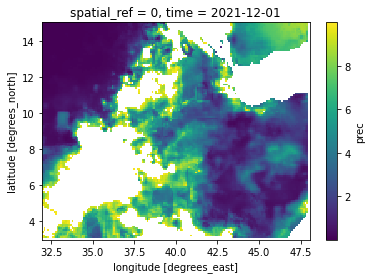

In [92]:
meher =geotiffs_ds.isel(time=[-1])
meher = meher.where(meher['prec'] < 10) 
meher.prec.plot() 

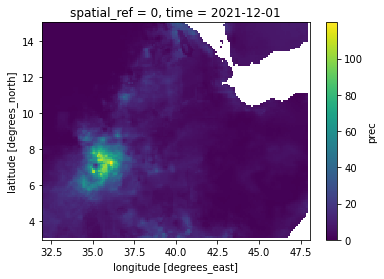

In [84]:
geotiffs_ds.prec.sel(time='2021-12-01T00:00:00.000000000').plot()

In [86]:
data=geotiffs_ds.prec.isel(time=[-1]) 
data

<xarray.DataArray 'prec' (time: 1, lat: 121, lon: 161)>
array([[[           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [9.85962257e+00, 9.04180425e+00, 8.55619995e+00, ...,
                    nan,            nan,            nan],
        [9.65647152e+00, 9.58600728e+00, 1.09313367e+01, ...,
                    nan,            nan,            nan],
        ...,
        [2.67222967e-03, 2.69364609e-03, 8.36175949e-04, ...,
         8.68743144e+00, 8.40981415e+00,            nan],
        [3.07431662e-03, 3.25859783e-03, 2.03649360e-03, ...,
         8.58294431e+00, 8.78649980e+00,            nan],
        [3.63694359e-03, 3.80233892e-03, 3.42466635e-03, ...,
         8.55710530e+00, 8.81610307e+00,            nan]]])
Coordinates:
    spatial_ref  int32 0
  * lat          (lat) float32 3.0 3.1 3.2 3.3 3.4 ... 14.6 14.7 14.8 14.9 15.0
  * lon          (lon) float32 32.0 32.1 32.2 32.3 32.4 ... 47.7 47.8 47.9 48.0
  * time         (time) datetime64[ns] 2021-12-01
Attributes:
    scale_factor:  1.0
    add_offset:    0.0

In [302]:
df_prediction_1 = df_prediction_ 
 
observation = geotiffs_ds['prec'].transpose(*preferred_dims)
#create one time sereies 
data3 = xr.concat([observation, df_prediction_1], dim="time")

data_icpac=data3#.rename({"y": "lat","x":"lon"})
# make sure we have the arrays with time as the inner-most dimension
preferred_dims = ('lat', 'lon', 'time')
data_icpac = data_icpac.transpose(*preferred_dims)
data_icpac['time']=pd.date_range(start=data_icpac['time'][0].values, periods=len(data_icpac['time'].values), freq='M')


In [ ]:
start=data_icpac['time'][-1]

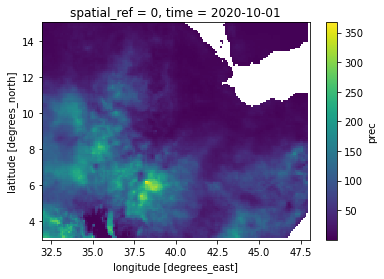

In [301]:

geotiffs_ds.prec.sel(time='2020-10-01').plot()

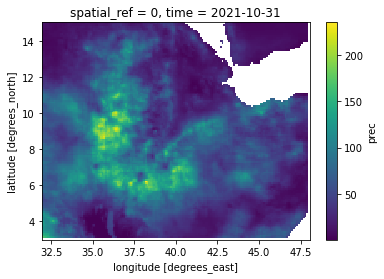

In [303]:
data_icpac.to_dataset().prec.sel(time='2021-10-31T00:00:00.000000000').plot()

In [304]:
data_arrays = {
    "low": data_icpac
}

for label, da in data_arrays.items():
    if da['lat'][0] > da['lat'][1]:
        print(f"The {label}-resolution DataArray's lats are descending -- flipping")
        da['lat'] = np.flip(da['lat'])
    if da['lon'][0] > da['lon'][1]:
        print(f"The {label}-resolution DataArray's lons are descending -- flipping")
        da['lon'] = np.flip(da['lon'])

da_precip_lo=data_arrays['low']
initial_year = int(da_precip_lo['time'][0].dt.year)
scale_months = 3

In [305]:
def apply_spi_gamma_monthly(
    data_array: xr.DataArray,
    months: int,
    data_start_year: int = 2000,
    calibration_year_initial: int = 2000,
    calibration_year_final: int = 2020,
) -> xr.DataArray:

    # stack the lat and lon dimensions into a new dimension named point, so at each lat/lon
    # we'll have a time series for the geospatial point, and group by these points
    da_precip_groupby = data_array.stack(point=('lat', 'lon')).groupby('point')

    spi_args = {
            'scale': months,
            'distribution': indices.Distribution.gamma,
            'data_start_year': data_start_year,
            'calibration_year_initial': calibration_year_initial,
            'calibration_year_final': calibration_year_final,
            'periodicity': compute.Periodicity.monthly
    }

    # apply the SPI function to the data array
    da_spi = xr.apply_ufunc(
        indices.spi,
        da_precip_groupby,
        kwargs=spi_args,
    )

    # unstack the array back into original dimensions
    da_spi = da_spi.unstack('point')
    
    return da_spi

In [207]:
#da_precip_lo=da_precip_lo.drop('spatial_ref')

In [306]:
da_spi_lo = apply_spi_gamma_monthly(da_precip_lo, 3)

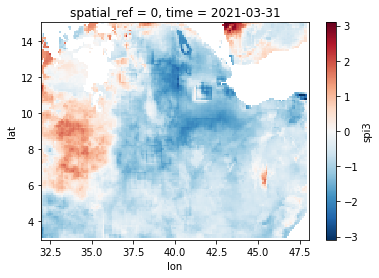

In [307]:
da_precip_hi = da_spi_lo.transpose('lat', 'lon', 'time')

spi_data=da_precip_hi.to_dataset(name='spi3')
spi_data.spi3.sel(time='2021-03-31T00:00:00.000000000').plot()

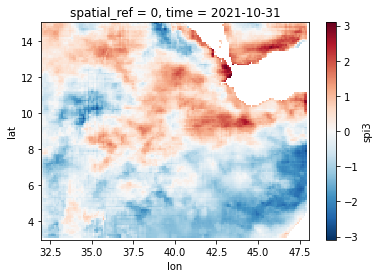

In [308]:
spi_data.spi3.sel(time='2021-10-31T00:00:00.000000000').plot()

In [319]:
 ############### probability information 
df_prediction=df_prediction.rename({"lat": "y","lon":"x"}).rio.write_crs("epsg:4326", inplace=True).rio.clip_box(minx=min_lon, miny=min_lat, maxx=max_lon, maxy=max_lat)


<xarray.DataArray 'below' (y: 115, x: 151)>
array([[39.491188, 39.698105, 39.426003, ...,       nan,       nan,       nan],
       [38.980656, 39.034874, 38.89473 , ...,       nan,       nan,       nan],
       [38.493496, 38.541344, 38.67948 , ...,       nan,       nan,       nan],
       ...,
       [      nan,       nan,       nan, ...,       nan,       nan,       nan],
       [      nan,       nan,       nan, ...,       nan,       nan,       nan],
       [      nan,       nan,       nan, ...,       nan,       nan,       nan]],
      dtype=float32)
Coordinates:
  * y            (y) float32 3.4 3.5 3.6 3.7 3.8 ... 14.4 14.5 14.6 14.7 14.8
  * x            (x) float32 33.0 33.1 33.2 33.3 33.4 ... 47.7 47.8 47.9 48.0
    spatial_ref  int32 0
Attributes:
    lead:            1
    average_op_ncl:  dim_avg_n over dimension(s): model
    type:            0

In [345]:
df_prediction =xr.open_dataset("C:/data/icpac/PredictedProbabilityRain_Feb_Jan2022.nc")
#df_prediction =xr.open_dataset("C:/data/icpac/PredictedRain_Mar-May_Feb2022.nc",decode_times=False)
    ### if the raster file has multiple formats select the band which is relevant for the analysis
#df_prediction =rio.open_rasterio("C:/data/icpac/PredictedRain_Mar-May_Feb2022.nc",decode_times=False).rio.write_crs("epsg:4326", inplace=True).rio.clip_box(minx=min_lon, miny=min_lat, maxx=max_lon, maxy=max_lat).to_dataset()#.sel(band=1).drop("band")
precipitation=df_prediction['below'].rename({"lat": "y","lon":"x"}).rio.write_crs("epsg:4326", inplace=True).rio.clip_box(minx=min_lon, miny=min_lat, maxx=max_lon, maxy=max_lat)#.sel(band=1).drop("band")

 

In [341]:
def is_amj(month):
    return (month >= 8) & (month <= 8)

seasonal_data_april = spi_data.sel(time=is_amj(spi_data['time.month']))

#seasonal_data_april=seasonal_data_april.loc[dict(lat=slice(min_lat, max_lat),lon=slice(min_lon,max_lon))]

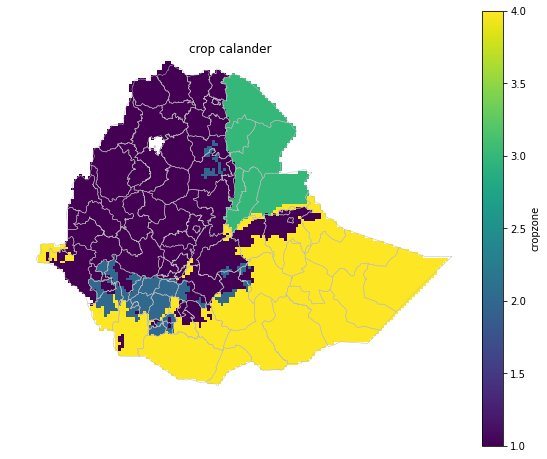

In [350]:

# make your geo cube 
out_grid = make_geocube(
    vector_data=lhz_df,
    measurements=["cropzone"],
    like=precipitation, # ensure the data are on the same grid
)


cropzone=out_grid['cropzone'].to_dataset()

# make your geo cube for admin layer
out_grid = make_geocube(
    vector_data=admin_df,
    measurements=["pcode"],
    like=cropzone, # ensure the data are on the same grid
)

out_grid=out_grid.drop('spatial_ref')
cropzone=cropzone.drop('spatial_ref')
crop_zone=cropzone['cropzone']

#out_grid["seasonal"] = (sesonal_precipitation.dims, sesonal_precipitation.values, sesonal_precipitation.attrs, sesonal_precipitation.encoding)
out_grid["cropzone"] = (crop_zone.dims, crop_zone.values)

f, ax = plt.subplots(figsize=(10, 8))

out_grid.cropzone.plot()#legend=True,legend_kwds={'label': "30th Total Rain for Jun-Sep rainfall average ",'orientation': "horizontal"})
ax.set_title("crop calander")
ax.set_axis_off()
admin_df.boundary.plot(ax=ax,color='#bdbdbd',linewidth=0.5)#,legend_kwds={'label': "30th Total Rain for Jun-Sep rainfall average ",'orientation': "horizontal"})
plt.show() 

In [351]:
 
ds_masked_ = seasonal_data_april#.where(forecast_df_all != -9999) 
 
df_prediction_1=seasonal_data_april.where(seasonal_data_april['spi3'] < -1.0) 

#np.datetime_as_string(df_prediction_1.time.values[0], unit='Y')

In [352]:
for i in df_prediction_1.time.values:
    df_prediction=df_prediction_1.sel(time=i).drop(['time','spatial_ref'])#.to_dataset()
    year_val=np.datetime_as_string(i, unit='Y')
 
    dff=df_prediction
    dff=dff.rename({"lat": "y","lon":"x"})

    dff1=dff['spi3']
    out_grid[f'{year_val}'] = (dff1.dims, dff1.values, dff1.attrs, dff1.encoding)
    #f, ax = plt.subplots(figsize=(10, 8))
    #dff.spi3.plot()
    #ax.set_title(f"Below treshold with 40th percentile forecast for {year_val} Keremet")
    #ax.set_axis_off()
    #admin_df.boundary.plot(ax=ax,color='#bdbdbd',linewidth=0.5)
    #plt.show()

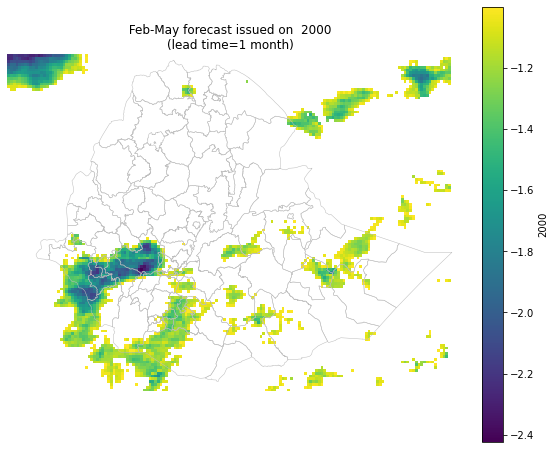

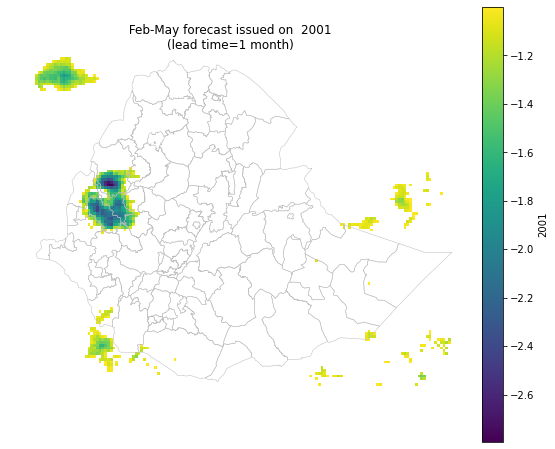

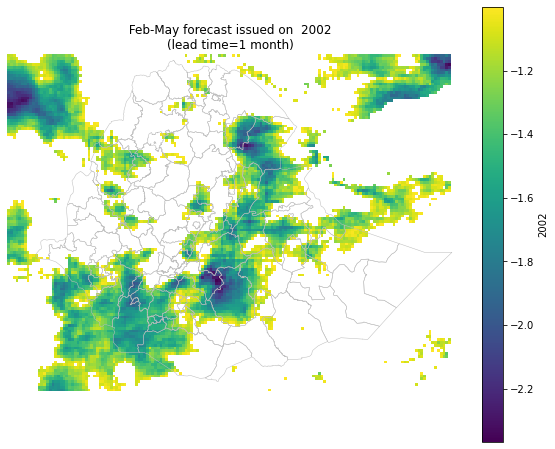

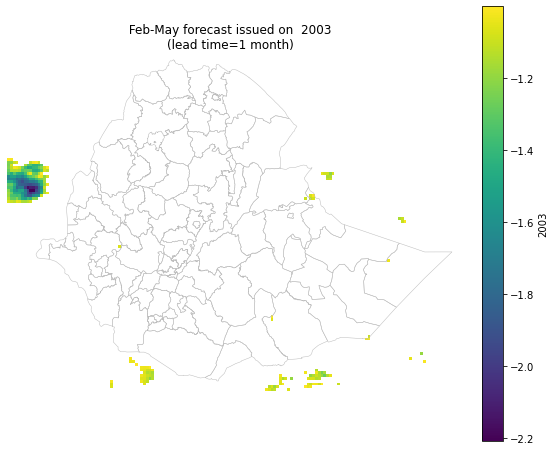

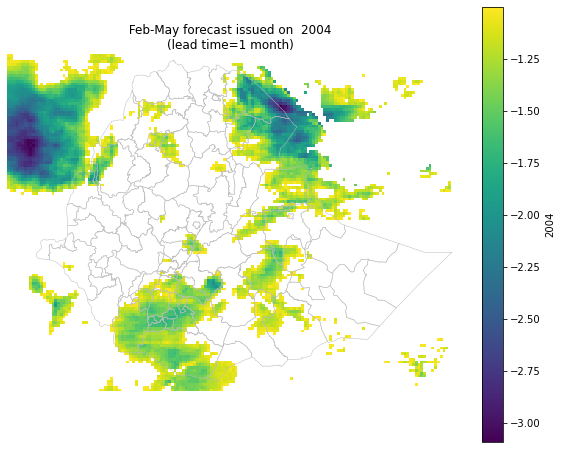

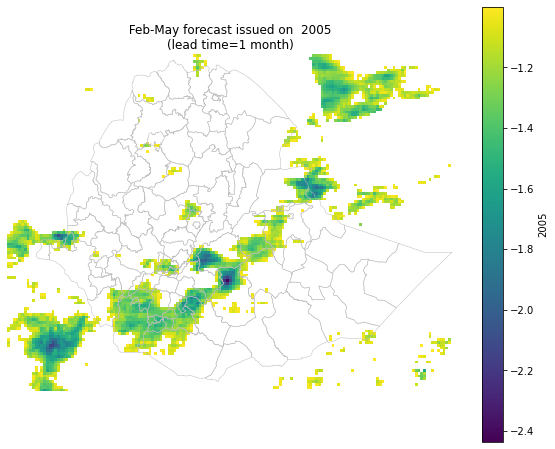

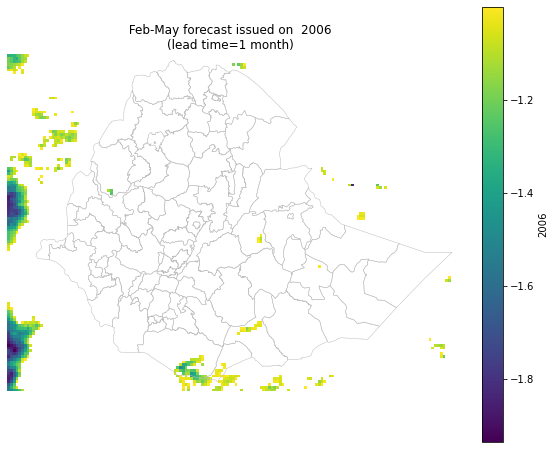

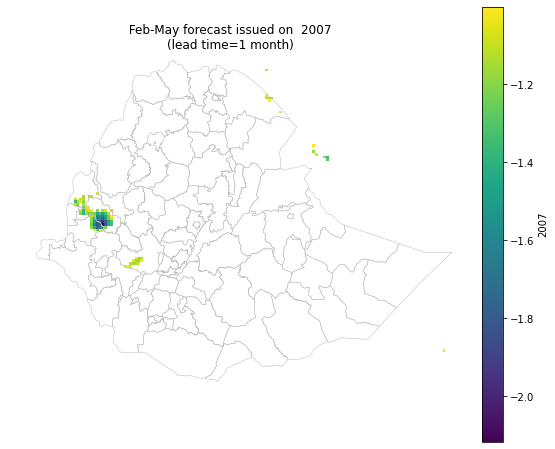

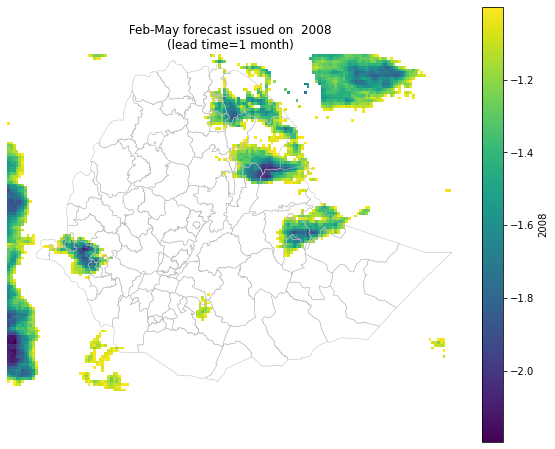

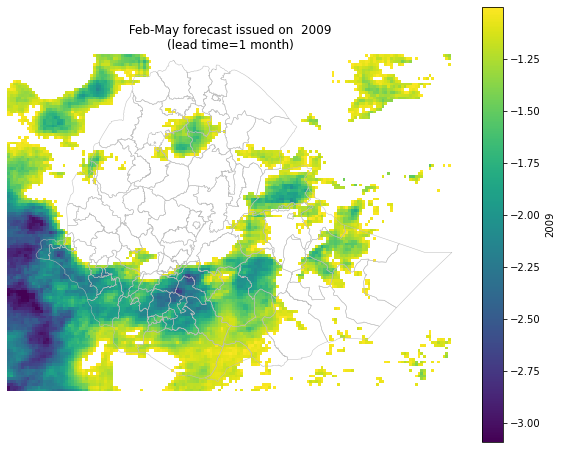

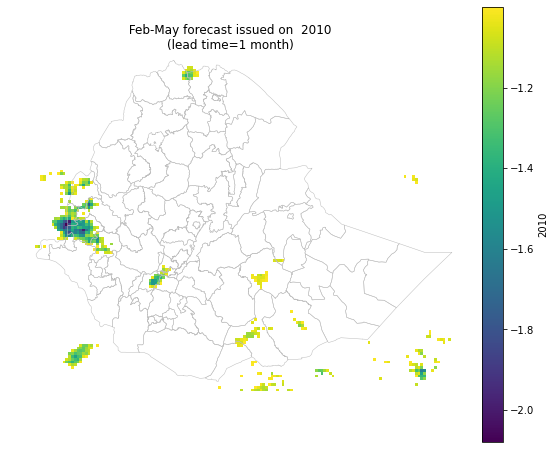

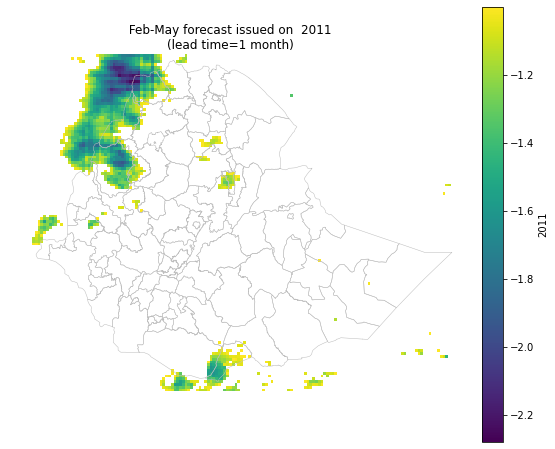

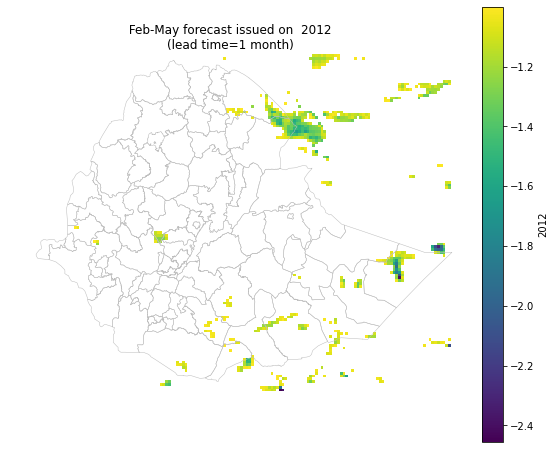

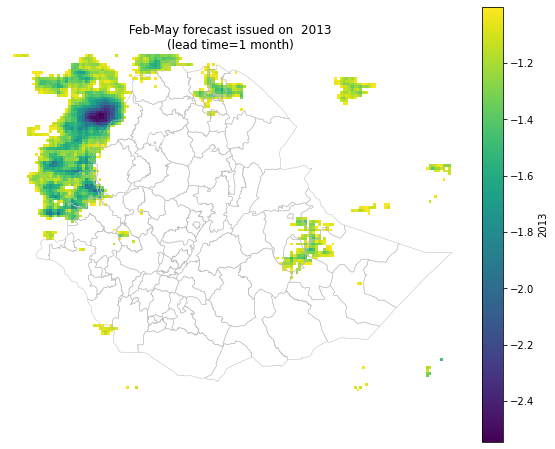

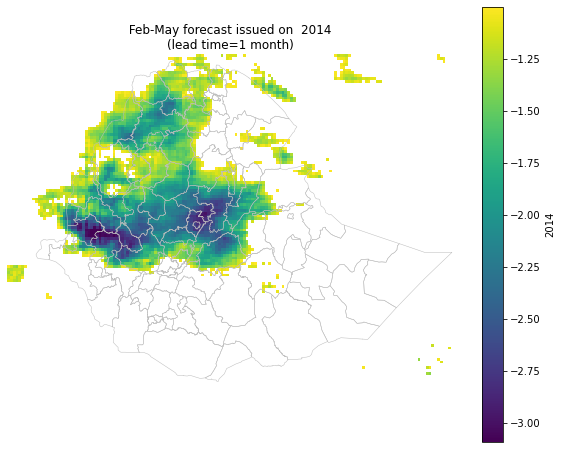

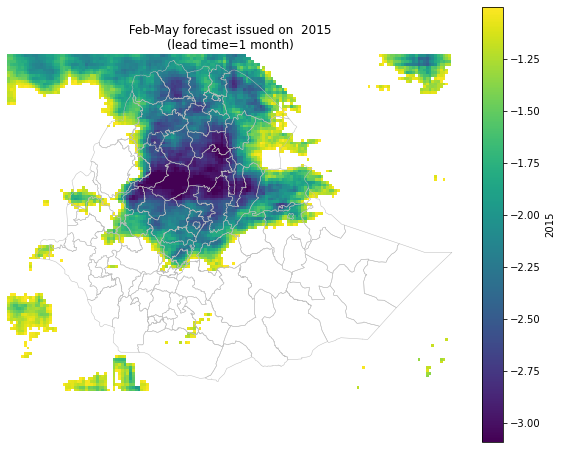

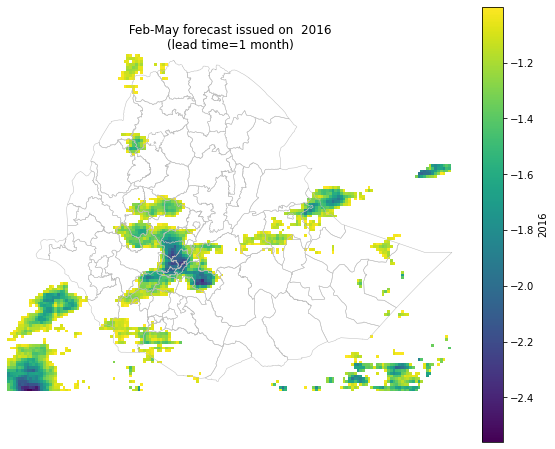

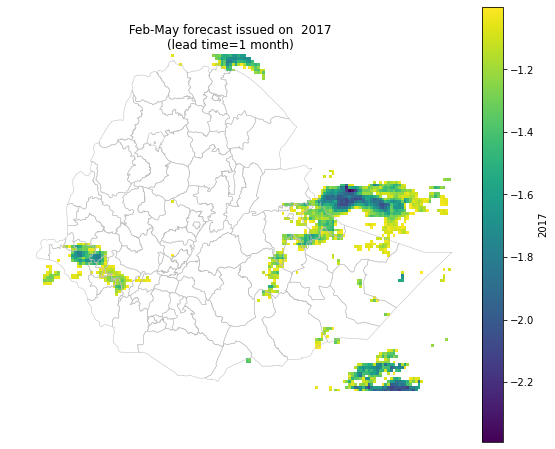

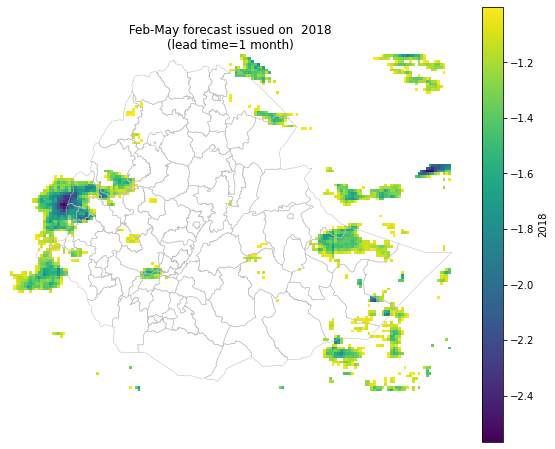

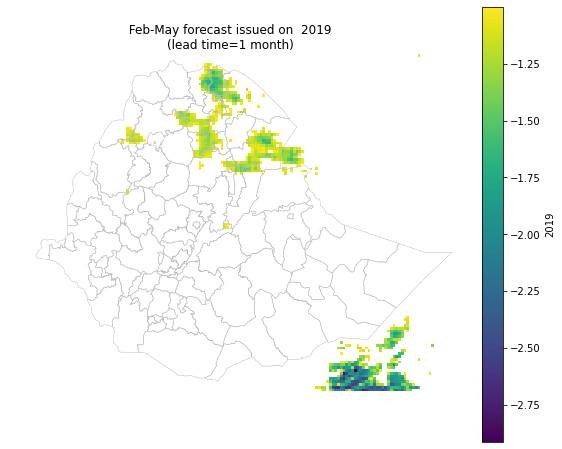

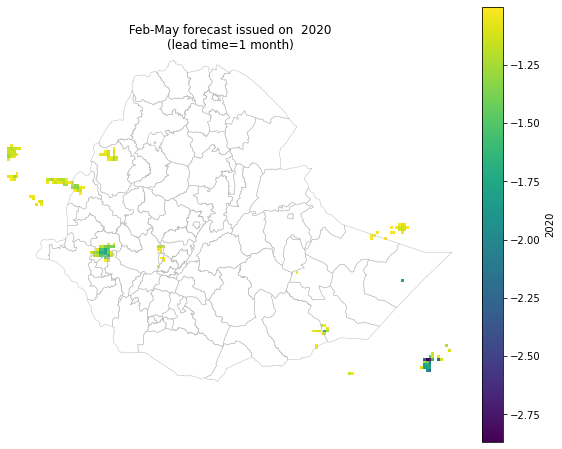

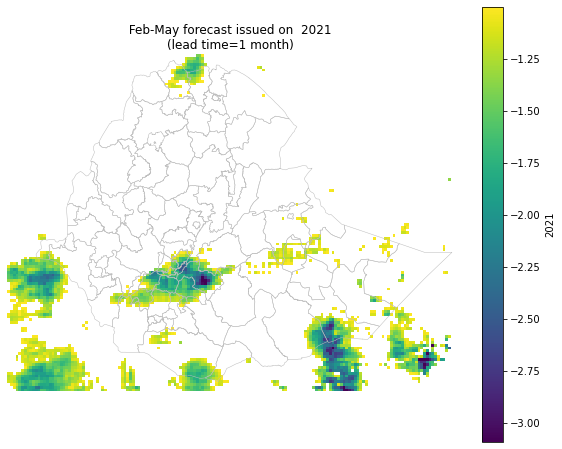

In [353]:
yearly_rain = [i for i in out_grid.drop_vars(['cropzone','pcode']).data_vars] 

meher = out_grid#.where(out_grid['cropzone'] == 4) 
for year_rain in yearly_rain:
    f, ax = plt.subplots(figsize=(10, 8))
    meher[year_rain].plot()
    ax.set_title(f" Feb-May forecast issued on  {year_rain} \n(lead time=1 month)",size=12) #Below  average rainfall forecast for
    ax.set_axis_off()
    admin_df.boundary.plot(ax=ax,color='#bdbdbd',linewidth=0.5)
    plt.show()

In [ ]:

from geocube.api.core import make_geocube
df_prediction =rioxarray.open_rasterio("C:/data/icpac/PredictedProbabilityRain_Feb_Jan2022.nc")
    ### if the raster file has multiple formats select the band which is relevant for the analysis
    #df_prediction =rio.open_rasterio("C:/data/icpac/PredictedRain_Mar-May_Feb2022.nc",decode_times=False).rio.write_crs("epsg:4326", inplace=True).rio.clip_box(minx=min_lon, miny=min_lat, maxx=max_lon, maxy=max_lat).to_dataset()#.sel(band=1).drop("band")
precipitation=df_prediction['below'].rename({"lat": "y","lon":"x"}).rio.write_crs("epsg:4326", inplace=True).rio.clip_box(minx=min_lon, miny=min_lat, maxx=max_lon, maxy=max_lat)#.sel(band=1).drop("band")



precipitation=df_prediction['below']
